# MDOF to equivalent SDOF using the first mode only

This IPython notebook converts a pushover curve for an MDOF system into an equivalent SDOF capacity curve, considering the first mode of vibration only. The supplied pushover curve, which is in terms of base shear and roof displacement, is transformed into an equivalent SDOF capacity curve, which is in terms of spectral acceleration and spectral displacement.

Note that this method assumes that the first mode shape Φ has been normalised to unit amplitude at the roof, i.e. Φn = 1, where n denotes the roof level. Similarly, the forces in the input pushover curves are assumed to be  normalized by the seismic weight of the structure.

The user has the option to derive the yielding Sa and Sd, if needed, using an idealisation of the sdof capacity curve, either bilinear or quadrilinear. To do so set the variable `idealised_type` to `'quadrilinear'` or `'bilinear'`, if the idealisation is not required then set it to `'none'`.

In [1]:
%matplotlib inline
from rmtk.vulnerability.common import utils
from rmtk.vulnerability.mdof_to_sdof.first_mode import first_mode

pushover_file = "../../../../../rmtk_data/capacity_curves_Vb-droof_first_mode.csv"

In [2]:
capacity_curves = utils.read_capacity_curves(pushover_file)
idealised_type = 'quadrilinear'; # 'bilinear', 'quadrilinear' or 'none'
sdof_capacity_curves = first_mode.mdof_to_sdof(capacity_curves, idealised_type)

utils.save_SdSa_capacity_curves(sdof_capacity_curves,'../../../../../rmtk_data/capacity_curves_sdof_first_mode.csv')

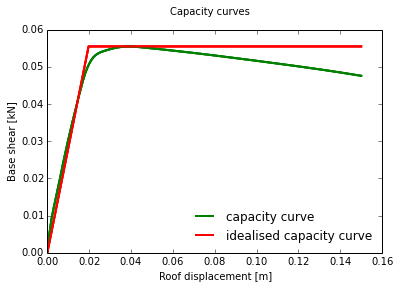

In [5]:
if idealised_type is not 'none':
    idealised_capacity = utils.idealisation(idealised_type, sdof_capacity_curves)
    utils.plot_idealised_capacity(idealised_capacity, sdof_capacity_curves, idealised_type)
else:
    utils.plot_capacity_curves(capacity_curves)
    utils.plot_capacity_curves(sdof_capacity_curves)